In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns


matplotlib.rcParams['font.family'] ='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] =False


from sklearn.preprocessing import StandardScaler # Scale 변환 -> 표준화 회귀계수 산출
from sklearn.model_selection import train_test_split

import copy
import missingno as msno
import datetime as dt
from dateutil.parser import parse

from tqdm import tqdm

In [56]:
path = './데이터/Sales_final.csv'
df_sales = pd.read_csv(path, encoding='utf-8', index_col = 0)

path = './데이터/Member_평균구매주기.csv'
df_members = pd.read_csv(path, encoding='utf-8', index_col = 0)

path = './데이터/Product_final.csv'
df_products = pd.read_csv(path, encoding='utf-8', index_col = 0)

C:\Users\insea\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\insea\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (20) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
purchase_dic = {}

# repurchase_dic = {고객: {상품: 상품 재구매 횟수, ... }, ...}
for idx, sale in tqdm(df_sales.iterrows()):
    # dict에 고객번호 추가
    if sale['고객번호'] not in purchase_dic:
        purchase_dic[sale['고객번호']] = {}
    # dict에 상품 및 상품 개수 추가
    if sale['상품명'] not in purchase_dic[sale['고객번호']]:
        purchase_dic[sale['고객번호']][sale['상품명']] = 1
    else: purchase_dic[sale['고객번호']][sale['상품명']] += 1  

#purchase_dic

199999it [00:26, 7460.87it/s]


In [7]:
repurchase_dic = copy.deepcopy(purchase_dic)
repurchase_copy_dic = copy.deepcopy(repurchase_dic)
for custom_key in tqdm(repurchase_copy_dic):
    for product_key in repurchase_copy_dic[custom_key]:
        # 1) 위에서 만든 dict에 아무런 상품을 구매하지 않은 고객 삭제
        if repurchase_dic[custom_key][product_key] == 1:
            del(repurchase_dic[custom_key][product_key])
    # 2) 고객이 구매하였지만 재구매하지 않은 상품 삭제
    if len(repurchase_dic[custom_key]) == 0:
        del(repurchase_dic[custom_key])
#repurchase_dic

100%|████████████████████████████████████████████████████████████████████████| 81360/81360 [00:00<00:00, 598636.55it/s]


# 물품별 구매 날짜 추가 

### 구매주기 

In [14]:
purchase_date_dic

{201812310749735: [['2019-05-06', '2019-05-07', '2019-05-11'],
  ['2020-02-20', '2020-02-21', '2020-02-23']],
 201812310749770: [['2019-02-28', '2019-03-01', '2019-03-05']],
 201812310749771: [['2019-05-13', '2019-05-14', '2019-05-16']],
 201812310749774: [['2019-05-10', '2019-05-11', '2019-05-13'],
  ['2019-07-29', '2019-07-30', '2019-08-02']],
 201812310749780: [['2019-01-30', '2019-01-31', '2019-02-02']],
 201812310749783: [['2019-01-17', '2019-01-18', '2019-01-20'],
  ['2019-06-30', '2019-07-01', '2019-07-03'],
  ['2019-06-30', '2019-07-01', '2019-07-03'],
  ['2019-07-23', '2019-07-24', '2019-07-26'],
  ['2019-08-09', '2019-08-10', '2019-08-12'],
  ['2020-02-10', '2020-02-11', '2020-02-13'],
  ['2020-02-10', '2020-02-11', '2020-02-13'],
  ['2020-07-11', '2020-07-12', '2020-07-14']],
 201812310749784: [['2019-04-29', '2019-04-30', '2019-05-04'],
  ['2019-06-25', '2019-06-26', '2019-06-28'],
  ['2019-09-28', '2019-09-29', '2019-10-01'],
  ['2020-01-17', '2020-01-18', '2020-01-20'],
 

In [16]:
# purchase_date_dic = copy.deepcopy(purchase_dic)
# for cus_num in purchase_date_dic:
#     purchase_date_dic[cus_num] = []
        
        
# for cus_num in tqdm(purchase_dic):
#     df_temp = df_sales[df_sales.고객번호 == cus_num]
#     df_temp = df_temp[df_temp.상품명 == product_name]
#     for idx, row in df_temp[['구매일','배송시작일', '배송완료일']].iterrows():
#         purchase_date_dic[cus_num].append(list(row))
#     df_temp['배송시작일']
# purchase_date_dic

### 재구매주기

In [19]:
repurchase_date_dic = copy.deepcopy(repurchase_dic)
for cus_num in repurchase_date_dic:
    for product_name in repurchase_date_dic[cus_num]:
        repurchase_date_dic[cus_num][product_name] = []
        
        
for cus_num in tqdm(repurchase_date_dic):
    for product_name in repurchase_date_dic[cus_num]:
            df_temp = df_sales[df_sales.고객번호 == cus_num]
            df_temp = df_temp[df_temp.상품명 == product_name]
            repurchase_date_dic[cus_num][product_name] = list(df_temp['구매일'])
repurchase_date_dic

100%|██████████████████████████████████████████████████████████████████████████████| 8232/8232 [02:41<00:00, 50.82it/s]


{201812310749787: {'하기스 네이처메이드 2단계 남아 156매(밴드형)': ['2019-01-01', '2019-03-15'],
  '하기스 네이처메이드 팬티 4단계 남아 96매(팬티형)': ['2019-11-26', '2020-01-23']},
 201812310749820: {'하기스 매직팬티 컴포트핏 5단계 여아 120매(팬티형)': ['2019-05-01',
   '2019-07-22',
   '2019-08-21']},
 201812310749826: {'더블하트 SofTouch 모유실감 젖병 240ml (M사이즈, 오렌지)': ['2019-01-04',
   '2019-01-31']},
 201812310749866: {'하기스 네이처메이드 2단계 여아 156매(밴드형)': ['2019-01-01',
   '2019-02-09']},
 201812310749901: {'릴리유 무민 시그니처 아기물티슈 캡형 72매X8팩': ['2019-07-23', '2019-10-18'],
  '더블하트 소프트 허니콤 수유패드 96매 (EA)': ['2020-07-09', '2020-07-30']},
 201812310749924: {'닥터마밍 촉촉케어 아기물티슈 휴대형 20매X20팩': ['2019-02-01',
   '2019-03-31',
   '2019-12-04']},
 201812310749982: {'크리넥스 순수 3겹 소프트 27m-30롤': ['2019-02-19', '2019-02-19']},
 201812310749992: {'하기스 네이처메이드 2단계 여아 156매(밴드형)': ['2019-01-05',
   '2019-02-03']},
 201812310750026: {'크리넥스 순수 3겹 소프트 27m-30롤': ['2019-04-02', '2019-04-02']},
 201812310750029: {'하기스 매직핏팬티 4단계 남아 20매(팬티형/체험팩)': ['2019-02-04',
   '2019-03-31']},
 201

In [20]:
def get_elapsed_time(start, end):
    start = parse(start)
    end = parse(end)
    elapsed_time = end-start
    return elapsed_time.days

In [23]:
repurchase_elapsed_time_dic = copy.deepcopy(repurchase_dic)
for cus_num in repurchase_elapsed_time_dic:
    repurchase_elapsed_time_dic[cus_num] = []

for cus_num in tqdm(repurchase_date_dic):
    for product_name in repurchase_date_dic[cus_num]:
        date_list = repurchase_date_dic[cus_num][product_name]
        for date in range(len(date_list)-1):
            repurchase_elapsed_time_dic[cus_num].append(get_elapsed_time(date_list[date],date_list[date+1])) 
repurchase_elapsed_time_dic

100%|████████████████████████████████████████████████████████████████████████████| 8232/8232 [00:01<00:00, 4542.76it/s]


{201812310749787: [73, 58],
 201812310749820: [82, 30],
 201812310749826: [27],
 201812310749866: [39],
 201812310749901: [87, 21],
 201812310749924: [58, 248],
 201812310749982: [0],
 201812310749992: [29],
 201812310750026: [0],
 201812310750029: [55],
 201812310750039: [45, 27, 28],
 201901010750095: [41],
 201901010750131: [0],
 201901010750163: [64],
 201901010750177: [33],
 201901010750181: [10,
  11,
  68,
  8,
  23,
  2,
  14,
  4,
  6,
  40,
  2,
  76,
  8,
  15,
  18,
  2,
  40,
  2,
  3,
  1,
  3],
 201901010750182: [51, 73, 50],
 201901010750210: [30],
 201901010750275: [35],
 201901010750298: [8],
 201901010750300: [80],
 201901010750318: [105, 6],
 201901010750324: [25, 18, 14],
 201901010750339: [6],
 201901010750345: [36],
 201901010750354: [29],
 201901010750360: [25],
 201901010750374: [54],
 201901010750384: [53],
 201901010750389: [32],
 201901010750467: [112],
 201901010750477: [70],
 201901010750498: [49],
 201901010750504: [33, 2, 2, 15, 2, 6, 8, 3, 1],
 20190101

In [52]:
repurchase_elapsed_time_dic_temp = copy.deepcopy(repurchase_elapsed_time_dic)
for cus_num in tqdm(repurchase_elapsed_time_dic_temp):
    while 0 in repurchase_elapsed_time_dic[cus_num]:
        repurchase_elapsed_time_dic[cus_num].remove(0)

for cus_num in tqdm(repurchase_elapsed_time_dic_temp):
    if len(repurchase_elapsed_time_dic[cus_num])==0:
        del(repurchase_elapsed_time_dic[cus_num])
repurchase_elapsed_time_dic

100%|█████████████████████████████████████████████████████████████████████████| 8232/8232 [00:00<00:00, 1034315.22it/s]


{201812310749787: [73, 58],
 201812310749820: [82, 30],
 201812310749826: [27],
 201812310749866: [39],
 201812310749901: [87, 21],
 201812310749924: [58, 248],
 201812310749992: [29],
 201812310750029: [55],
 201812310750039: [45, 27, 28],
 201901010750095: [41],
 201901010750163: [64],
 201901010750177: [33],
 201901010750181: [10,
  11,
  68,
  8,
  23,
  2,
  14,
  4,
  6,
  40,
  2,
  76,
  8,
  15,
  18,
  2,
  40,
  2,
  3,
  1,
  3],
 201901010750182: [51, 73, 50],
 201901010750210: [30],
 201901010750275: [35],
 201901010750298: [8],
 201901010750300: [80],
 201901010750318: [105, 6],
 201901010750324: [25, 18, 14],
 201901010750339: [6],
 201901010750345: [36],
 201901010750354: [29],
 201901010750360: [25],
 201901010750374: [54],
 201901010750384: [53],
 201901010750389: [32],
 201901010750467: [112],
 201901010750477: [70],
 201901010750498: [49],
 201901010750504: [33, 2, 2, 15, 2, 6, 8, 3, 1],
 201901010750528: [2],
 201901010750529: [81, 16, 16],
 201901010750543: [4, 2

In [57]:
repurchase_mean_time_dic = copy.deepcopy(repurchase_elapsed_time_dic)
for cus_num in repurchase_elapsed_time_dic:
    repurchase_mean_time_dic[cus_num] = int(np.mean(np.array(repurchase_elapsed_time_dic[cus_num])))
    
df_repurchase_mean_time = pd.DataFrame({'고객번호': repurchase_mean_time_dic.keys(), '평균재구매주기': repurchase_mean_time_dic.values()})
df_members = pd.merge(df_members, df_repurchase_mean_time, on='고객번호', how='left')
df_members

,Unnamed: 0.1,고객번호,성별,결혼유무,거주지역,연령,결제등록카드,유입경로,자녀여부,평균 배송리드타임,...,총결제금액,최종구매일,휴면지속날짜,휴면계정여부,회당 결제금액,나이대,첫구매일,사이트 이용 기간,평균구매주기,평균재구매주기
0,0,201812310749735,여,기혼,인천,37.0,국민은행,인스타그램,Yes,4.0,...,54083,2020-02-20,169,True,27041.5,30대,2019-05-06,291.0,290.0,NaN
1,1,201812310749770,여,기혼,제주,33.0,국민은행,검색광고,Yes,5.0,...,3800,2019-02-28,526,True,3800.0,30대,2019-02-28,1.0,NaN,NaN
2,2,201812310749771,여,기혼,부산,32.0,하나은행,네이버블로그,Yes,3.0,...,47922,2019-05-13,452,True,47922.0,30대,2019-05-13,1.0,NaN,NaN
3,3,201812310749774,여,미혼,경남,34.0,기업은행,지인추천,No,3.5,...,116532,2019-07-29,375,True,58266.0,30대,2019-05-10,81.0,80.0,NaN
4,4,201812310749780,여,기혼,서울,32.0,신한은행,직접검색,Yes,3.0,...,19900,2019-01-30,555,True,19900.0,30대,2019-01-30,1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67318,67318,201912291058164,여,기혼,경기,31.0,국민은행,오픈마켓,Yes,3.0,...,25778,2020-06-01,67,False,25778.0,30대,NaN,NaN,NaN,NaN
67319,67319,201912291058167,여,기혼,경남,37.0,롯데카드,오픈마켓,Yes,3.0,...,99893,2020-04-19,110,False,49946.5,30대,NaN,NaN,NaN,NaN
67320,67320,201912291058168,여,기혼,충북,26.0,삼성카드,검색광고,Yes,3.5,...,163234,2020-07-18,20,False,40808.5,20대,NaN,NaN,NaN,NaN
67321,67321,201912291058169,여,기혼,경기,32.0,새마을금고,인스타그램,Yes,3.0,...,36579,2019-12-29,222,True,36579.0,30대,NaN,NaN,NaN,NaN


In [58]:
df_members.loc[:,'고객번호':].to_csv('./데이터/Member_final.csv', encoding='utf-8-sig', index=False)

In [59]:
df_members['평균구매주기']

0        290.0
1          NaN
2          NaN
3         80.0
4          NaN
         ...  
67318      NaN
67319      NaN
67320      NaN
67321      NaN
67322      NaN
Name: 평균구매주기, Length: 67323, dtype: float64

In [60]:
df_members['평균구매주기'].isnull().sum()

40082

In [9]:
elapsed_time = []
for cus_num in repurchase_elapsed_time_dic:
    for product_name in repurchase_elapsed_time_dic[cus_num]:
        for time in repurchase_elapsed_time_dic[cus_num][product_name]:
            elapsed_time.append(time)
df_elapsed_time = pd.DataFrame({'elapsed_time':elapsed_time})
df_elapsed_time.describe()

,elapsed_time
count,15043.000000
mean,42.777305
std,51.246285
min,0.000000
25%,10.000000
50%,27.000000
75%,57.000000
max,464.000000


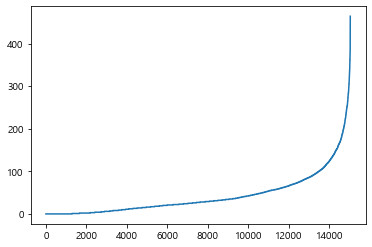

In [10]:
plt.plot(sorted(elapsed_time));

In [11]:
def get_elapsed_time(time):
    if time <= 10: return '재구매기간0-10'
    elif time <= 20: return '재구매기간11-20'
    elif time <= 30: return '재구매기간21-30'
    elif time <= 40: return '재구매기간31-40'
    elif time <= 50: return '재구매기간41-50'
    elif time <= 60: return '재구매기간51-60'
    elif time <= 70: return '재구매기간61-70'
    elif time <= 80: return '재구매기간71-80'
    elif time <= 90: return '재구매기간81-90'
    elif time <= 100: return '재구매기간91-100'
    else: return '재구매기간101-'

In [12]:
def add_repurchase(df, key_name, key, row): # key: 고객번호, 상품명 | target: 
    if len(df[df[key_name]==key]) == 0 :
        return True
    idx = df[df[key_name] == key].index[0]
    if pd.isna(df.loc[idx, row]) == True:
        df.loc[idx, row] = 1
    else: df.loc[idx, row] += 1
    return False

In [13]:
repurchase_elapsed_time = ['재구매기간0-10','재구매기간11-20','재구매기간21-30','재구매기간31-40','재구매기간41-50','재구매기간51-60','재구매기간61-70','재구매기간71-80','재구매기간81-90','재구매기간91-100','재구매기간101-']
for time in repurchase_elapsed_time:
    df_products[time] = np.nan
    df_members[time] = np.nan
quit = 0
for cus_num in tqdm(repurchase_elapsed_time_dic):
    for product_name in repurchase_elapsed_time_dic[cus_num]:
        for time in repurchase_elapsed_time_dic[cus_num][product_name]:
            row = get_elapsed_time(time)
    
            # 고객
            # 탈퇴한 고객일 경우 True 반환 받아서 탈퇴회원 수 1 증가
            if add_repurchase(df_members, '고객번호', cus_num, row): quit+=1
           
            # 상품
            add_repurchase(df_products, '상품명', product_name, row)
print('탈퇴회원 수:', quit)

100%|██████████████████████████████████████████████████████████████████████████████| 8232/8232 [03:12<00:00, 42.73it/s]

탈퇴회원 수: 1184


In [15]:
df_members.to_csv('member_기간별재구매횟수.csv', encoding = 'utf-8-sig')
df_products.to_csv('product_기간별재구매횟수.csv', encoding = 'utf-8-sig')